In [20]:
# Numerical libraries
import numpy as np
#import pandas library
import pandas as pd
#for normalization
from sklearn.preprocessing import StandardScaler

# Import Naive Bayes machine learning library
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#loading dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

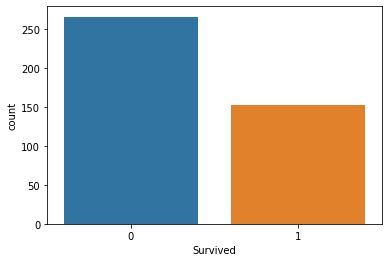

In [22]:
sns.countplot(x='Survived',data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

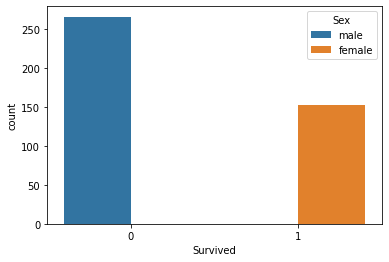

In [23]:
sns.countplot(x='Survived', hue='Sex', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

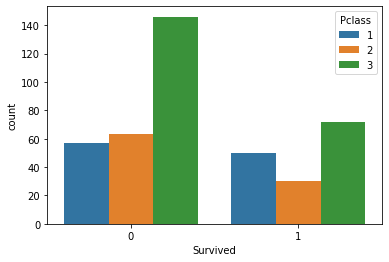

In [24]:
sns.countplot(x='Survived', hue='Pclass', data= df)

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Cleaning dataset

In [26]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [28]:
df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked'])

In [29]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,0,1,0,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1


In [30]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


## Split into Train and test data

In [31]:
X = df.drop('Survived',axis= 1)
y = df['Survived']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train the model

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state =0)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [34]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

# Caculating Accuracy using Desicion Tree Classifier

In [43]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71,  0],
       [ 0, 55]], dtype=int64)

In [45]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


# Caculating Accuracy using NaiveBayes Classifier

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [48]:
print(X_train)

          Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
208  33.00000      0      0  27.7208         1         0         0   
56   35.00000      0      0   7.8958         0         0         1   
8    18.00000      0      0   7.2292         0         0         1   
315  17.00000      0      0   7.7333         0         0         1   
155  24.00000      0      0   7.5500         0         0         1   
..        ...    ...    ...      ...       ...       ...       ...   
323  33.00000      0      0  26.5500         1         0         0   
192  11.50000      1      1  14.5000         0         0         1   
117   1.00000      1      1  16.7000         0         0         1   
47   30.27259      0      0   7.7500         0         0         1   
172  23.00000      1      0  13.9000         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
208           1         0           1           0           0  
56            0         1      

In [49]:
print(y_train)

208    1
56     0
8      1
315    1
155    0
      ..
323    0
192    0
117    1
47     0
172    0
Name: Survived, Length: 313, dtype: int64


In [50]:
print(X_test)

          Age  SibSp  Parch      Fare  Pclass_1  Pclass_2  Pclass_3  \
360  14.50000      8      2   69.5500         0         0         1   
170  30.27259      0      0    7.5500         0         0         1   
224  53.00000      0      0   27.4458         1         0         0   
358  30.27259      0      0    7.7500         0         0         1   
309  45.00000      1      0   14.1083         0         0         1   
..        ...    ...    ...       ...       ...       ...       ...   
390  23.00000      0      0   93.5000         1         0         0   
274  30.27259      0      0    7.2250         0         0         1   
217  57.00000      1      1  164.8667         1         0         0   
397  48.00000      1      1   79.2000         1         0         0   
325  23.00000      0      0    7.0500         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
360           0         1           0           0           1  
170           0    

In [51]:
print(y_test)

360    0
170    0
224    1
358    0
309    1
      ..
390    0
274    0
217    0
397    1
325    0
Name: Survived, Length: 105, dtype: int64


# Feature Scaling 

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

[[58  0]
 [ 0 47]]
Accuracy:  100.0
